# Чтение данных

Импорт необходимых библиотек

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score


import tensorflow as tf
tf.set_random_seed(1)


# Беглый взгляд на данные

In [2]:
df_train = pd.read_csv('train_sample.csv')
df_test = pd.read_csv('test_sample.csv')

print(df_train.columns)
df_train.head()

Index(['system:index', 'NDSI', 'NDVI', 'NDWI', 'RND', 'blue', 'currentDate',
       'date', 'dayNumber', 'green', 'name', 'nir', 'randomDayNum',
       'realmed_NDSI', 'realmed_NDVI', 'realmed_NDWI', 'realmed_blue',
       'realmed_green', 'realmed_nir', 'realmed_red', 'realmed_swir1',
       'realmed_swir2', 'red', 'swir1', 'swir2', 'tmpDayRND', 'tmpYearRND',
       'tree_canopy_cover', 'uncertainty', '.geo'],
      dtype='object')


system:index      NDSI      NDVI  \
0  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11_0  0.412171  0.406655   
1  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11_1  0.460697  0.474908   
2  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11_2  0.276366  0.289328   
3  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11_3  0.453246  0.456599   
4  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11_4  0.291562  0.291867   

       NDWI       RND      blue  currentDate     date  dayNumber     green  \
0 -0.045052  0.179016  0.007979      16216.0  16216.0   0.353425  0.031681   
1 -0.068859  0.179016  0.014466      16216.0  16216.0   0.353425  0.041071   
2 -0.048675  0.179016  0.008874      16216.0  16216.0   0.353425  0.024566   
3 -0.048981  0.179016  0.014272      16216.0  16216.0   0.353425  0.040784   
4 -0.031500  0.179016  0.010315      16216.0  16216.0   0.353425  0.026654   

   ...  realmed_swir1  realmed_swir2       red     swir1     swir2  tmpDayRND  \
0  ...        0.17230         0.0837  0.027268  0.147547  0.090581   0.426319   
1  ...        0.18120         0.0837  0.034223  0.180658  0.108788   0.426319   
2  ...        0.17130         0.0744  0.020146  0.107605  0.064560   0.426319   
3  ...        0.23100         0.1197  0.036140  0.185298  0.113715   0.426319   
4  ...        0.22815         0.1173  0.023413  0.123722  0.074249   0.426319   

   tmpYearRND  tree_canopy_cover  uncertainty  .geo  
0    0.400438               0.54     0.177851   NaN  
1    0.400438               0.67     0.178055   NaN  
2    0.400438               0.58     0.175930   NaN  
3    0.400438               0.19     0.182277   NaN  
4    0.400438               0.27     0.187987   NaN  

[5 rows x 30 columns]

In [3]:
band_names = ['swir2','swir1','nir','red','green','blue', 'NDVI', 'NDSI', 'NDWI']
real_band_names = ['realmed_'+n for n in band_names]

names = ['system:index', 'name', 'date', 'dayNumber', 'tree_canopy_cover'] + band_names + real_band_names
print(names)

df_train = df_train[names]
df_test = df_test[names]
df_test.head()

['system:index', 'name', 'date', 'dayNumber', 'tree_canopy_cover', 'swir2', 'swir1', 'nir', 'red', 'green', 'blue', 'NDVI', 'NDSI', 'NDWI', 'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue', 'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI']


system:index    name     date  \
0  1_000037b73a9c59e4f346_1_000037b73a9c59e4f346_0  Change  16224.0   
1  1_000037b73a9c59e4f346_1_000037b73a9c59e4f346_1  Change  16224.0   
2  1_000037b73a9c59e4f346_1_000037b73a9c59e4f346_2  Change  16224.0   
3  1_000037b73a9c59e4f346_1_000037b73a9c59e4f346_3  Change  16224.0   
4  1_0000e646f958cf61d67c_1_0000e646f958cf61d67c_0  Change  16833.0   

   dayNumber  tree_canopy_cover     swir2     swir1       nir       red  \
0   0.375342               0.59  0.085401  0.149670  0.228706  0.028008   
1   0.375342               0.53  0.086260  0.161994  0.269452  0.027812   
2   0.375342               0.57  0.048561  0.089311  0.135357  0.013309   
3   0.375342               0.57  0.079334  0.147269  0.233749  0.022649   
4   0.043836               0.63  0.049153  0.044575  0.189150  0.115988   

      green      ...           NDWI  realmed_swir2  realmed_swir1  \
0  0.038474      ...      -0.125062         0.0868        0.17030   
1  0.043424      ...      -0.168171         0.0706        0.16570   
2  0.019923      ...      -0.064242         0.0744        0.16870   
3  0.033519      ...      -0.110226         0.0756        0.17620   
4  0.115733      ...      -0.407760         0.1007        0.09395   

   realmed_nir  realmed_red  realmed_green  realmed_blue  realmed_NDVI  \
0      0.35960      0.04510        0.06800        0.0251      0.777119   
1      0.42310      0.03220        0.06670        0.0220      0.858555   
2      0.40110      0.03230        0.06380        0.0240      0.850946   
3      0.45200      0.03210        0.06680        0.0235      0.867383   
4      0.44905      0.38225        0.36205        0.3528      0.078459   

   realmed_NDSI  realmed_NDWI  
0      0.581244     -0.357237  
1      0.674583     -0.437160  
2      0.678607     -0.407862  
3      0.691791     -0.439032  
4     -0.607501     -0.654902  

[5 rows x 23 columns]

In [4]:
changes = df_train.loc[df_train['date'] > 0 ]
no_changes = df_train.loc[df_train['date'] == -1]

print(df_train.shape)
print(changes.shape)
print(no_changes.shape)


print()
changes1 = df_test.loc[df_test['date'] > 0 ]
no_changes1 = df_test.loc[df_test['date'] == -1]

print(df_test.shape)
print(changes1.shape)
print(no_changes1.shape)


(34469, 23)
(3728, 23)
(30741, 23)

(14906, 23)
(1992, 23)
(12914, 23)


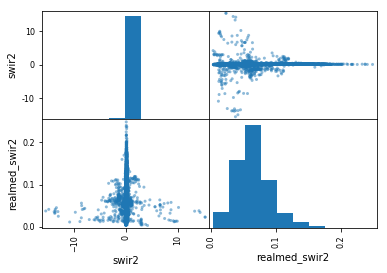

In [5]:
_ = pd.plotting.scatter_matrix(no_changes[['swir2', 'realmed_swir2']], marker='.')

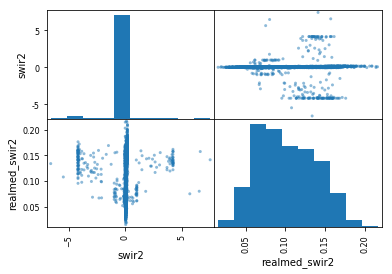

In [6]:
_ = pd.plotting.scatter_matrix(changes[['swir2', 'realmed_swir2']], marker='.')

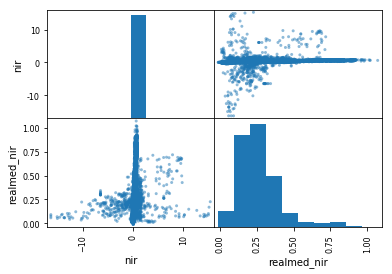

In [7]:
_ = pd.plotting.scatter_matrix(no_changes[['nir', 'realmed_nir']], marker='.')

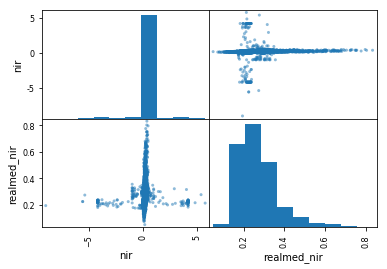

In [8]:
_ = pd.plotting.scatter_matrix(changes[['nir', 'realmed_nir']], marker='.')

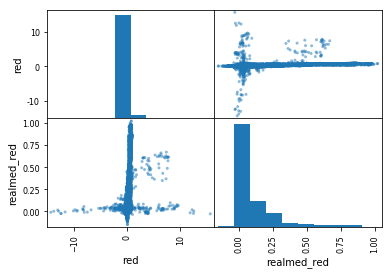

In [9]:
_ = pd.plotting.scatter_matrix(no_changes[['red', 'realmed_red']], marker='.')

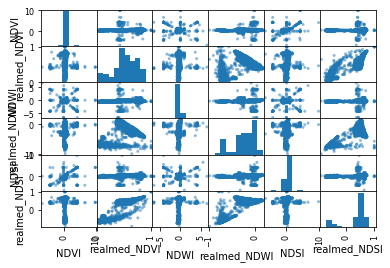

In [10]:
_ = pd.plotting.scatter_matrix(changes[['NDVI', 'realmed_NDVI', 'NDWI', 'realmed_NDWI', 'NDSI', 'realmed_NDSI']], marker='.')

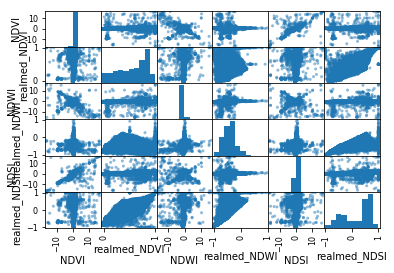

In [11]:
_ = pd.plotting.scatter_matrix(no_changes[['NDVI', 'realmed_NDVI', 'NDWI', 'realmed_NDWI', 'NDSI', 'realmed_NDSI']], marker='.')

# Предобработка обучающего и тестового множеств

In [12]:
# Все завязано на конкретный формат файла. При необходимости - менять функцию
def prepare_data(data):
    # ['system:index', 'name', 'date', 'tree_canopy_cover', 'swir2', 'swir1', 'nir', 'red', 'green', 'blue', 'NDVI', 'NDSI', 'NDWI', 'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue', 'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI']

    
    bands = [
        'swir2', 'swir1', 'nir', 'red', 'green', 'blue',
        'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue'
    ]
    
    indices = [
        'NDVI', 'NDSI', 'NDWI', 
        'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI'
    ]
    
    inputs = bands + indices
    
        
    # В system:index содержится ID полигона (у нас много точек на полигон), чтобы избежать оптимистичной оценки из-за автокорреляции
    # выделим номер полигона и сохраним
    data['system:index'] = data['system:index'].str.extract(r'(.+)_\d+$')
    
    data['change'] = (data['name'] == 'Change').astype(int)

    
    addons = ['system:index', 'dayNumber', 'tree_canopy_cover', 'change']
    # addons = ['system:index', 'change']
        
    # names = set(inputs) - set(['name'])
    names = inputs + addons
    print(names)
    return data[names]
  



In [13]:
train_data = prepare_data(df_train.copy())
test_data = prepare_data(df_test.copy())

train_data.head()

['swir2', 'swir1', 'nir', 'red', 'green', 'blue', 'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue', 'NDVI', 'NDSI', 'NDWI', 'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI', 'system:index', 'dayNumber', 'tree_canopy_cover', 'change']
['swir2', 'swir1', 'nir', 'red', 'green', 'blue', 'realmed_swir2', 'realmed_swir1', 'realmed_nir', 'realmed_red', 'realmed_green', 'realmed_blue', 'NDVI', 'NDSI', 'NDWI', 'realmed_NDVI', 'realmed_NDSI', 'realmed_NDWI', 'system:index', 'dayNumber', 'tree_canopy_cover', 'change']


swir2     swir1       nir       red     green      blue  realmed_swir2  \
0  0.090581  0.147547  0.181833  0.027268  0.031681  0.007979         0.0837   
1  0.108788  0.180658  0.226369  0.034223  0.041071  0.014466         0.0837   
2  0.064560  0.107605  0.138718  0.020146  0.024566  0.008874         0.0744   
3  0.113715  0.185298  0.221983  0.036140  0.040784  0.014272         0.1197   
4  0.074249  0.123722  0.148481  0.023413  0.026654  0.010315         0.1173   

   realmed_swir1  realmed_nir  realmed_red   ...        NDVI      NDSI  \
0        0.17230       0.3801      0.04780   ...    0.406655  0.412171   
1        0.18120       0.4200      0.03770   ...    0.474908  0.460697   
2        0.17130       0.4243      0.03350   ...    0.289328  0.276366   
3        0.23100       0.4489      0.05950   ...    0.456599  0.453246   
4        0.22815       0.4547      0.05175   ...    0.291867  0.291562   

       NDWI  realmed_NDVI  realmed_NDSI  realmed_NDWI  \
0 -0.045052      0.776583      0.565652     -0.376177   
1 -0.068859      0.835263      0.655551     -0.397206   
2 -0.048675      0.853648      0.672852     -0.424782   
3 -0.048981      0.766783      0.591216     -0.321441   
4 -0.031500      0.797841      0.634916     -0.334113   

                                    system:index  dayNumber tree_canopy_cover  \
0  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11   0.353425              0.54   
1  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11   0.353425              0.67   
2  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11   0.353425              0.58   
3  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11   0.353425              0.19   
4  1_00008ea38552f9c3ea11_1_00008ea38552f9c3ea11   0.353425              0.27   

   change  
0       1  
1       1  
2       1  
3       1  
4       1  

[5 rows x 22 columns]

In [14]:
def split_data(data, train_val_test=0.66, group='system:index'):
  np.random.seed(1)
  ids = set(data[group])
  count = len(ids)
  print('Found %s unique areas' % (count))

  train_count = int(count * train_val_test)
  
  train = np.random.choice(list(ids), train_count, False)

  val_ids = ids.difference(set(train))
  val = np.array(list(val_ids))
  
  train = data[data[group].isin(train)]
  val = data[data[group].isin(val)]
  
  train = np.array(train.drop(labels=[group], axis=1))
  val = np.array(val.drop(labels=[group], axis=1))

  return train, val
  

# Обучение модели

In [15]:
def get_batch(data, size, input_count):
    batch = data[np.random.randint(data.shape[0], size=size), :]

    # add a little of noise
    errors = np.random.uniform(low=-0.0001, high=0.0001, size=(size, input_count))
    x = batch[:, :input_count]
    x += + errors
    

    y = batch[:, input_count:]
    
    return x, y
 

In [16]:
def print_model(x_test, y_test):
    model_dir = '.'
    result_filename_prefix = 'res_'
    
    """   
    inference_graph = tf.Graph()
    with tf.Session(graph=inference_graph) as sess:
        loader = tf.train.import_meta_graph(os.path.join(model_dir, model_name+".meta"))
        loader.restore(sess, os.path.join(model_dir, model_name))

        # x = tf.placeholder(tf.float32, [None, input_count])
        # y_ = tf.placeholder(tf.int32, [None, out_count])

        _loss = inference_graph.get_tensor_by_name('loss:0')
        _loss1 = inference_graph.get_tensor_by_name('loss1:0')
        _x = inference_graph.get_tensor_by_name('input:0')
        _y = inference_graph.get_tensor_by_name('target:0')

        _W1 = inference_graph.get_tensor_by_name('weights/w1:0')
        _W2 = inference_graph.get_tensor_by_name('weights/w2:0')
        _W3 = inference_graph.get_tensor_by_name('weights/w3:0')

        _b1 = inference_graph.get_tensor_by_name('biases/b1:0')
        _b2 = inference_graph.get_tensor_by_name('biases/b2:0')
        _b3 = inference_graph.get_tensor_by_name('biases/b3:0')



        print('test ACC:\t', sess.run(_loss, feed_dict={_x: x_test,_y: y_test}))
        print('test ACC1:\t', sess.run(_loss1, feed_dict={_x: x_test,_y: y_test}))
    """
    
    print('test ACC:\t', sess.run(loss, feed_dict={x: x_test, y_: y_test}))
    print('test ACC1:\t', sess.run(loss1, feed_dict={x: x_test, y_: y_test}))

    bestW1, bestW2, bestW3, bestB1, bestB2, bestB3 = sess.run([W1, W2, W3, b1, b2, b3])

    os.makedirs(model_dir, exist_ok=True)
    np.savetxt(os.path.join(model_dir, result_filename_prefix+'w1.txt'), bestW1, delimiter=', ', newline='],\n[', header='[\n', footer='', comments='')
    np.savetxt(os.path.join(model_dir, result_filename_prefix+'b1.txt'), bestB1, delimiter=', ', newline=',\n', header='[\n', footer=']', comments='')

    np.savetxt(os.path.join(model_dir, result_filename_prefix+'w2.txt'), bestW2, delimiter=', ', newline='],\n[', header='[\n[', footer=']', comments='')
    np.savetxt(os.path.join(model_dir, result_filename_prefix+'b2.txt'), bestB2, delimiter=', ', newline=',\n', header='[\n', footer=']', comments='')

    np.savetxt(os.path.join(model_dir, result_filename_prefix+'w3.txt'), bestW3, delimiter=', ', newline='],\n[', header='[\n[', footer=']', comments='')
    np.savetxt(os.path.join(model_dir, result_filename_prefix+'b3.txt'), bestB3, delimiter=', ', newline=',\n', header='[\n', footer=']', comments='')




In [17]:
def model(x, W1, W2, W3, b1, b2, b3):
    # tf.summary.histogram('w3', W3)
    # tf.summary.histogram('b3', b3)

    l1 = tf.nn.relu(tf.matmul(x, W1) + b1)
    # tf.summary.histogram('l1', l1)

    l2 = tf.nn.relu(tf.matmul(l1, W2) + b2)
    # tf.summary.histogram('l2', l2)

    l3_logits = tf.matmul(l2, W3) + b3
    # tf.summary.histogram('l3_logits', l3_logits)

    return l3_logits

In [18]:
test = np.array(test_data.drop(labels=['system:index'], axis=1))
test = np.float32(test)


train, val = split_data(train_data.copy())

Found 431 unique areas


In [22]:
layer1 = 10
layer2 = 5

summaries_dir = '.'
model_dir = '.'
max_epoch = 50000


out_count = 1
input_count = train.shape[1] - out_count


x = tf.placeholder(tf.float32, [None, input_count], name='input')

with tf.name_scope('weights'):
    W1 = tf.Variable(tf.truncated_normal([input_count, layer1], stddev=0.5), name='w1')
    W2 = tf.Variable(tf.truncated_normal([layer1, layer2], stddev=0.5), name='w2')
    W3 = tf.Variable(tf.truncated_normal([layer2, out_count], stddev=0.5), name='w3')

with tf.name_scope('biases'):
    b1 = tf.Variable(tf.zeros([layer1]), name='b1')
    b2 = tf.Variable(tf.zeros([layer2]), name='b2')
    b3 = tf.Variable(tf.zeros([out_count]), name='b3')

logits = model(x, W1, W2, W3, b1, b2, b3)
y = tf.sigmoid(logits, name='result')


# Define loss and optimizer
y_ = tf.placeholder(tf.int32, [None, out_count], name='target')

loss1 = tf.reduce_mean(
    tf.losses.absolute_difference(labels=y_, predictions=y), name='loss1')
# tf.summary.scalar('abs_diff', loss1)

reg_w = 0.0000001
loss = tf.reduce_mean(
    # tf.losses.sparse_softmax_cross_entropy(labels=[y_], logits=[tf.transpose([-logits, logits])]) +
    loss1 + reg_w*(tf.nn.l2_loss(W1)+tf.nn.l2_loss(W2)+tf.nn.l2_loss(W3)),
    name='loss'
)


# tf.summary.scalar('Regularized loss', loss)

optimizer = tf.train.AdamOptimizer(learning_rate=0.005)
optimizer = optimizer.minimize(loss)

saver = tf.train.Saver(max_to_keep=1)


sess = tf.InteractiveSession()

# merged = tf.summary.merge_all()
# train_writer = tf.summary.FileWriter(summaries_dir + '/train', sess.graph)
# test_writer = tf.summary.FileWriter(summaries_dir + '/test')

tf.global_variables_initializer().run()
# Train
best_loss = 9999999999999
for epoch in range(max_epoch):
    batch_xs, batch_ys = get_batch(train, 2**10, input_count)
    
    # print(batch_xs.dtype, batch_xs.shape)
    _, train_loss, train_loss1 = sess.run(
        [optimizer, loss, loss1], feed_dict={x: batch_xs, y_: batch_ys}
    )
    # train_writer.add_summary(summary, epoch)

    # Test trained model
    if epoch % 100 == 99:
        val_loss = sess.run(loss, feed_dict={x: val[:, :input_count], y_: val[:, input_count:]})
        print('EPOCH', epoch+1, '\tVal Loss =', val_loss, 'Loss1: \tval', sess.run(loss1, feed_dict={x: val[:, :input_count], y_: val[:, input_count:]}), '\ttrain', train_loss1)
        # test_writer.add_summary(summary, epoch)

        if val_loss < best_loss:
            best_loss = val_loss

            # saver.save(sess, os.path.join(model_dir, "model"))
          
print('Best val LOSS:', best_loss)
test_loss, test_loss1 = sess.run(
        [loss, loss1], feed_dict={x: test[:, :input_count], y_: test[:, input_count:]})

print('Test Loss1 =', test_loss1, 'Test Loss =', test_loss)

print_model(test[:, :input_count], test[:, input_count:])


y_pred_vec = sess.run(y, feed_dict={x: val[:, :input_count]})
y_pred_vec = (y_pred_vec>0.5).astype(int)
y_true_vec = val[:, input_count:]

conf_mat = confusion_matrix(y_true_vec, y_pred_vec)
print('ConfMatr Val')
print(pd.DataFrame(conf_mat))

print('VAL AUC:',roc_auc_score(y_true_vec, y_pred_vec))


y_pred_vec = sess.run(y, feed_dict={x: test[:, :input_count]})
y_pred_vec = (y_pred_vec>0.5).astype(int)
y_true_vec = test[:, input_count:]

conf_mat = confusion_matrix(y_true_vec, y_pred_vec)
print('ConfMatr Test')
print(pd.DataFrame(conf_mat))

print('Test AUC:', roc_auc_score(y_true_vec, y_pred_vec))




# Random Output for test GEE NNet:
tmp = 2*np.random.uniform(size=20) - 1
print(repr(tmp))

sess.run(y, feed_dict={x: tmp.reshape((-1, 20))})


EPOCH 100 	Val Loss = 0.084755786 Loss1: 	val 0.084752455 	train 0.119153276
EPOCH 200 	Val Loss = 0.083048515 Loss1: 	val 0.08304509 	train 0.1095732
EPOCH 300 	Val Loss = 0.082517445 Loss1: 	val 0.08251387 	train 0.123058386
EPOCH 400 	Val Loss = 0.08228957 Loss1: 	val 0.08228581 	train 0.106543735
EPOCH 500 	Val Loss = 0.082395 Loss1: 	val 0.082391 	train 0.12570663
EPOCH 600 	Val Loss = 0.082699634 Loss1: 	val 0.082695425 	train 0.14096619
EPOCH 700 	Val Loss = 0.08316547 Loss1: 	val 0.083160706 	train 0.113181844
EPOCH 800 	Val Loss = 0.08301363 Loss1: 	val 0.08300851 	train 0.1064806
EPOCH 900 	Val Loss = 0.08213818 Loss1: 	val 0.08213272 	train 0.11383274
EPOCH 1000 	Val Loss = 0.081846885 Loss1: 	val 0.08184119 	train 0.12310911
EPOCH 1100 	Val Loss = 0.08155646 Loss1: 	val 0.08155043 	train 0.110532105
EPOCH 1200 	Val Loss = 0.08139498 Loss1: 	val 0.0813886 	train 0.115330875
EPOCH 1300 	Val Loss = 0.080953196 Loss1: 	val 0.08094661 	train 0.124168284
EPOCH 1400 	Val Loss = 0.

EPOCH 11000 	Val Loss = 0.09197886 Loss1: 	val 0.09194886 	train 0.05712168
EPOCH 11100 	Val Loss = 0.09965737 Loss1: 	val 0.09962721 	train 0.047391947
EPOCH 11200 	Val Loss = 0.09376425 Loss1: 	val 0.093733914 	train 0.036678754
EPOCH 11300 	Val Loss = 0.08774164 Loss1: 	val 0.08771117 	train 0.05685184
EPOCH 11400 	Val Loss = 0.090382636 Loss1: 	val 0.09035207 	train 0.04486775
EPOCH 11500 	Val Loss = 0.09860998 Loss1: 	val 0.09857927 	train 0.032055944
EPOCH 11600 	Val Loss = 0.094543345 Loss1: 	val 0.094512545 	train 0.033836067
EPOCH 11700 	Val Loss = 0.08776346 Loss1: 	val 0.0877325 	train 0.05231553
EPOCH 11800 	Val Loss = 0.08892441 Loss1: 	val 0.08889331 	train 0.037137493
EPOCH 11900 	Val Loss = 0.08894122 Loss1: 	val 0.088909976 	train 0.048976272
EPOCH 12000 	Val Loss = 0.10338074 Loss1: 	val 0.10334938 	train 0.04598151
EPOCH 12100 	Val Loss = 0.083750986 Loss1: 	val 0.08371945 	train 0.040033497
EPOCH 12200 	Val Loss = 0.08771684 Loss1: 	val 0.087685175 	train 0.03502790

EPOCH 21700 	Val Loss = 0.07647917 Loss1: 	val 0.07643622 	train 0.03836848
EPOCH 21800 	Val Loss = 0.09013095 Loss1: 	val 0.09008791 	train 0.036645606
EPOCH 21900 	Val Loss = 0.07217654 Loss1: 	val 0.07213341 	train 0.044403087
EPOCH 22000 	Val Loss = 0.07347157 Loss1: 	val 0.07342834 	train 0.03846811
EPOCH 22100 	Val Loss = 0.082663536 Loss1: 	val 0.082620196 	train 0.03823658
EPOCH 22200 	Val Loss = 0.08131142 Loss1: 	val 0.08126794 	train 0.037353627
EPOCH 22300 	Val Loss = 0.0790883 Loss1: 	val 0.07904469 	train 0.0327279
EPOCH 22400 	Val Loss = 0.08172364 Loss1: 	val 0.081679955 	train 0.040177554
EPOCH 22500 	Val Loss = 0.081680804 Loss1: 	val 0.08163705 	train 0.031219471
EPOCH 22600 	Val Loss = 0.0818482 Loss1: 	val 0.08180437 	train 0.03843545
EPOCH 22700 	Val Loss = 0.07353374 Loss1: 	val 0.073489755 	train 0.040705465
EPOCH 22800 	Val Loss = 0.07879657 Loss1: 	val 0.07875251 	train 0.03779919
EPOCH 22900 	Val Loss = 0.087226085 Loss1: 	val 0.08718197 	train 0.03081669
EPO

EPOCH 32400 	Val Loss = 0.09102711 Loss1: 	val 0.09097409 	train 0.0319506
EPOCH 32500 	Val Loss = 0.09341216 Loss1: 	val 0.09335908 	train 0.022846244
EPOCH 32600 	Val Loss = 0.08425066 Loss1: 	val 0.084197536 	train 0.031178396
EPOCH 32700 	Val Loss = 0.08793962 Loss1: 	val 0.087886445 	train 0.032938343
EPOCH 32800 	Val Loss = 0.076582134 Loss1: 	val 0.07652882 	train 0.040485382
EPOCH 32900 	Val Loss = 0.082142554 Loss1: 	val 0.08208914 	train 0.026522692
EPOCH 33000 	Val Loss = 0.08746242 Loss1: 	val 0.08740893 	train 0.037710566
EPOCH 33100 	Val Loss = 0.08579807 Loss1: 	val 0.08574444 	train 0.028717443
EPOCH 33200 	Val Loss = 0.07240628 Loss1: 	val 0.07235253 	train 0.035820752
EPOCH 33300 	Val Loss = 0.08006907 Loss1: 	val 0.080015235 	train 0.029959751
EPOCH 33400 	Val Loss = 0.09101038 Loss1: 	val 0.09095642 	train 0.037395284
EPOCH 33500 	Val Loss = 0.08179932 Loss1: 	val 0.08174527 	train 0.032279834
EPOCH 33600 	Val Loss = 0.095209435 Loss1: 	val 0.095155284 	train 0.0302

EPOCH 43100 	Val Loss = 0.08571676 Loss1: 	val 0.085652776 	train 0.03062245
EPOCH 43200 	Val Loss = 0.08262666 Loss1: 	val 0.08256252 	train 0.018893985
EPOCH 43300 	Val Loss = 0.10037121 Loss1: 	val 0.100306965 	train 0.024115533
EPOCH 43400 	Val Loss = 0.094188906 Loss1: 	val 0.09412455 	train 0.036272123
EPOCH 43500 	Val Loss = 0.09180838 Loss1: 	val 0.09174397 	train 0.033797733
EPOCH 43600 	Val Loss = 0.07781546 Loss1: 	val 0.077750966 	train 0.023644995
EPOCH 43700 	Val Loss = 0.09033461 Loss1: 	val 0.09026998 	train 0.021556448
EPOCH 43800 	Val Loss = 0.07455 Loss1: 	val 0.07448525 	train 0.028937439
EPOCH 43900 	Val Loss = 0.08245746 Loss1: 	val 0.08239268 	train 0.024379322
EPOCH 44000 	Val Loss = 0.084862836 Loss1: 	val 0.08479799 	train 0.023185385
EPOCH 44100 	Val Loss = 0.07633408 Loss1: 	val 0.07626914 	train 0.03807572
EPOCH 44200 	Val Loss = 0.07550009 Loss1: 	val 0.075435 	train 0.024938248
EPOCH 44300 	Val Loss = 0.088692084 Loss1: 	val 0.0886269 	train 0.02696388
EP

array([[0.]], dtype=float32)

In [23]:
print('Test AUC:',roc_auc_score(y_true_vec, y_pred_vec))

Test AUC: 0.8756682296788205


In [26]:
tmp = 2*np.random.uniform(size=20) - 1
print(repr(tmp))

sess.run(y, feed_dict={x: tmp.reshape((-1, 20))})

array([-0.14611971,  0.13522329,  0.79863368, -0.97986135, -0.91889338,
        0.82063745, -0.2887705 ,  0.09524544,  0.7237635 , -0.53998518,
        0.00459389, -0.64237538, -0.94869853,  0.02560021,  0.5722184 ,
        0.8966821 ,  0.64373288,  0.16484302, -0.58804028, -0.55935906])


array([[0.99993074]], dtype=float32)